In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_6.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_6.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,2.272854e-11,1.291363e-09,3.453104e-11,0.880602,1.935356e-11,2.615407e-13,0.000001,1.199251e-09,...,2.780386e-09,7.249003e-28,8.218853e-17,1.187610e-17,2.698916e-08,1.067374e-05,-7.879200e-04,5.331454e-27,3.377751e-27,2.158586e-28
1,0.000017,0.405009,8.817785e-11,2.464085e-09,1.309110e-10,0.880602,7.465607e-11,1.942029e-12,0.000002,4.794342e-09,...,6.039273e-09,3.731931e-27,1.863419e-16,3.588966e-17,4.095658e-08,1.091823e-05,-7.881161e-04,3.769102e-26,2.376792e-26,1.571649e-27
2,0.000025,0.405009,1.924776e-10,3.529468e-09,2.791672e-10,0.880602,1.619111e-10,6.309985e-12,0.000003,1.078388e-08,...,1.036799e-08,1.187733e-26,3.338447e-16,7.830846e-17,5.523977e-08,1.116178e-05,-7.883137e-04,1.491640e-25,9.603717e-26,6.401061e-27
3,0.000033,0.405009,3.320511e-10,4.497958e-09,4.704511e-10,0.880602,2.773280e-10,1.451106e-11,0.000005,1.916595e-08,...,1.565201e-08,2.905960e-26,5.256731e-16,1.427135e-16,6.983666e-08,1.140296e-05,-7.885123e-04,4.287859e-25,2.837420e-25,1.890979e-26
4,0.000042,0.405009,5.036828e-10,5.378963e-09,6.971249e-10,0.880602,4.174269e-10,2.754934e-11,0.000006,2.993871e-08,...,2.178996e-08,5.953763e-26,7.627940e-16,2.318973e-16,8.474340e-08,1.164056e-05,-7.887113e-04,1.005857e-24,6.867290e-25,4.557080e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.970535,5.897548e-01,7.917200e-01,8.235509e-01,0.127105,9.861070e-01,8.750661e-01,0.041582,3.654180e-02,...,-4.808321e-20,-1.111531e-21,-1.744621e-22,-2.555139e-25,-7.287828e-27,-6.379768e-29,-4.189194e-31,-2.266469e-20,-4.472284e-21,-5.166894e-22
119995,0.999967,0.970535,5.897548e-01,7.917200e-01,8.235509e-01,0.127105,9.861070e-01,8.750661e-01,0.041582,3.654180e-02,...,-4.749811e-20,-1.112801e-21,-1.739484e-22,-2.558990e-25,-7.294501e-27,-6.374351e-29,-4.166787e-31,-2.267311e-20,-4.474177e-21,-5.165703e-22
119996,0.999975,0.970535,5.897548e-01,7.917200e-01,8.235509e-01,0.127105,9.861070e-01,8.750661e-01,0.041582,3.654180e-02,...,-4.840398e-20,-1.112356e-21,-1.740708e-22,-2.564203e-25,-7.296701e-27,-6.377717e-29,-4.201378e-31,-2.260693e-20,-4.472144e-21,-5.161739e-22
119997,0.999983,0.970535,5.897548e-01,7.917200e-01,8.235509e-01,0.127105,9.861070e-01,8.750661e-01,0.041582,3.654180e-02,...,-4.861762e-20,-1.119850e-21,-1.736524e-22,-2.557100e-25,-7.318782e-27,-6.376084e-29,-4.190585e-31,-2.260951e-20,-4.468382e-21,-5.174970e-22


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

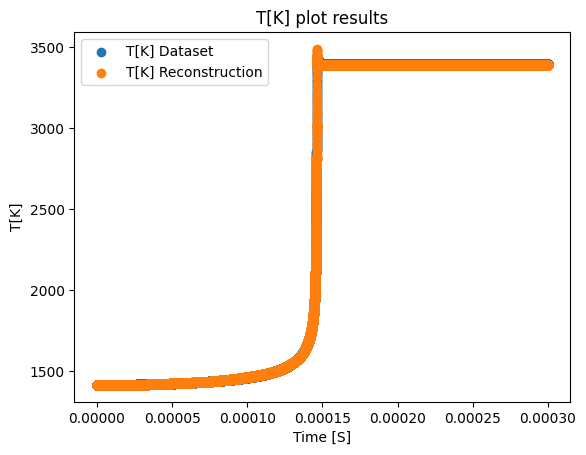

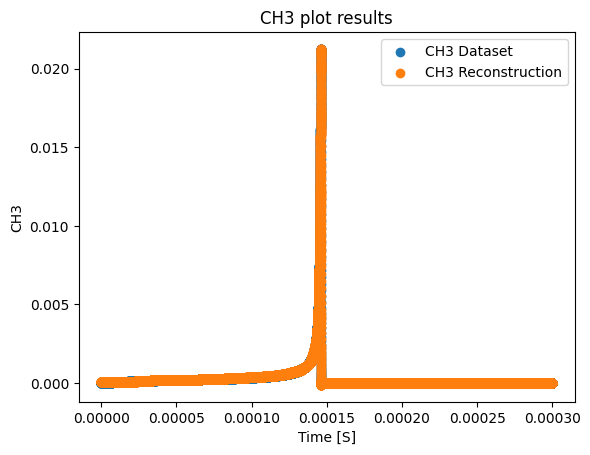

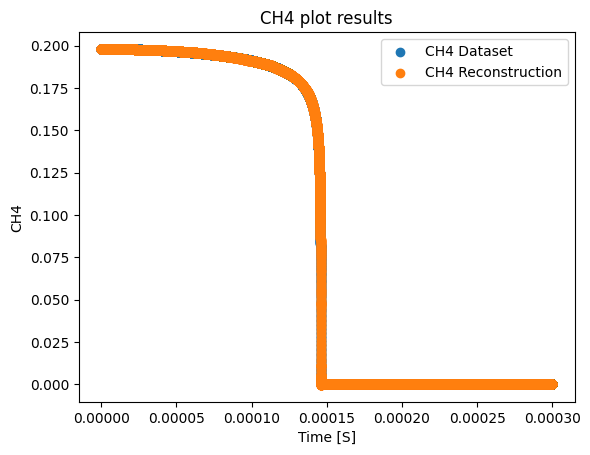

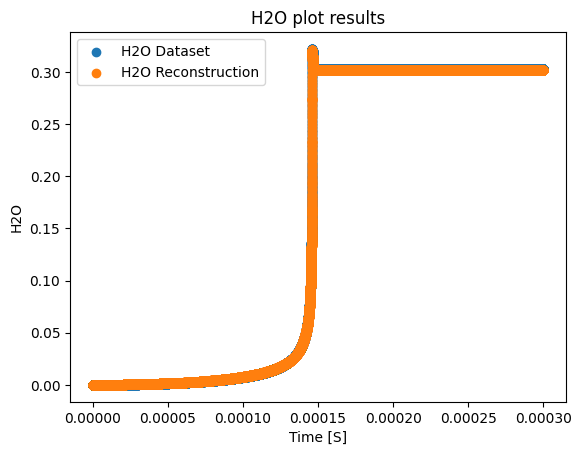

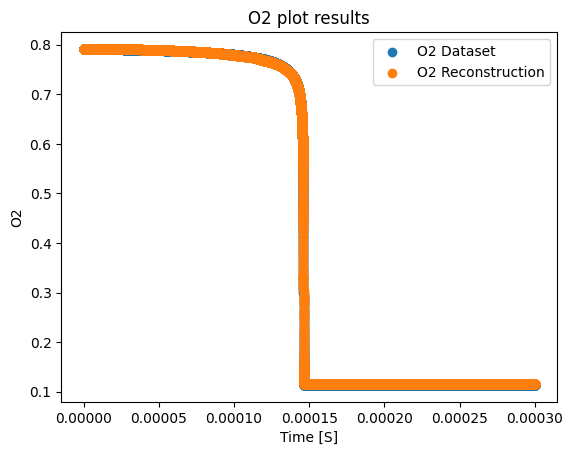

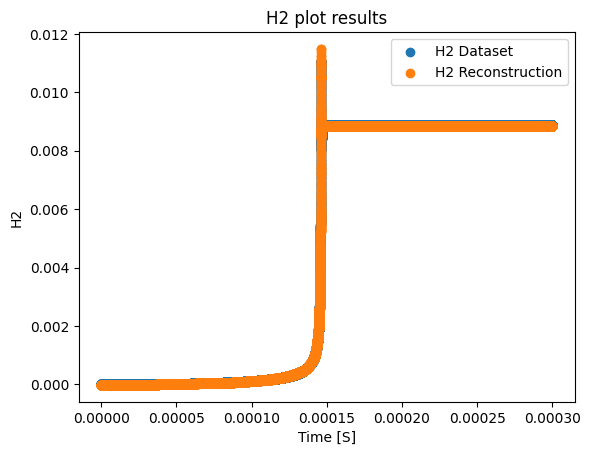

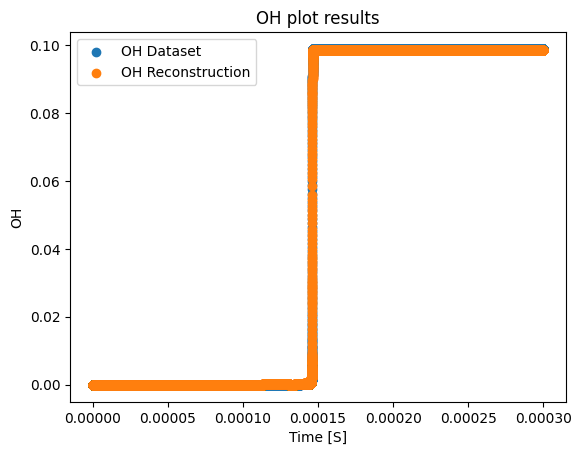

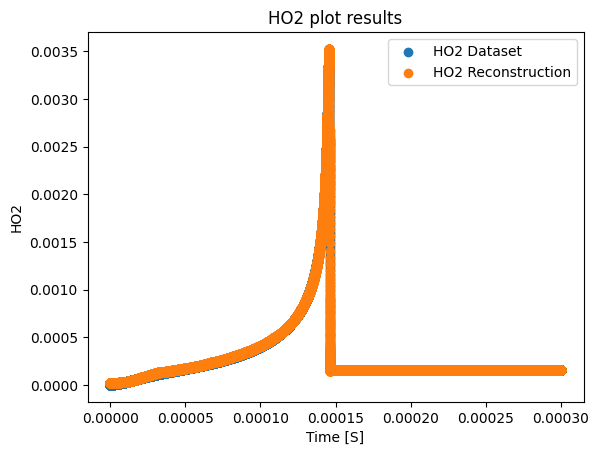

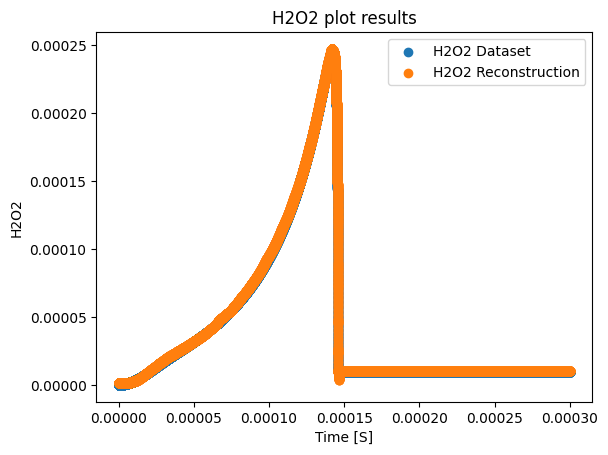

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

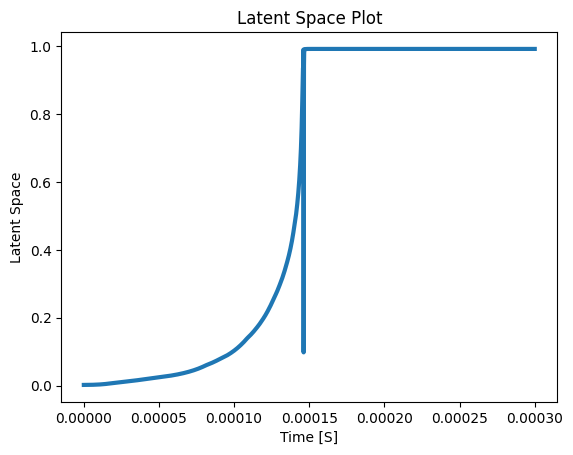

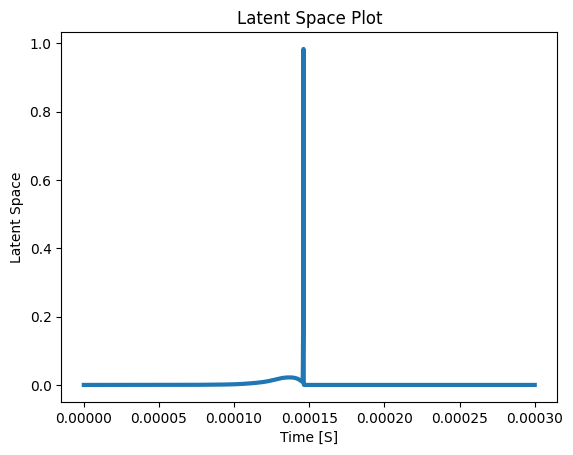

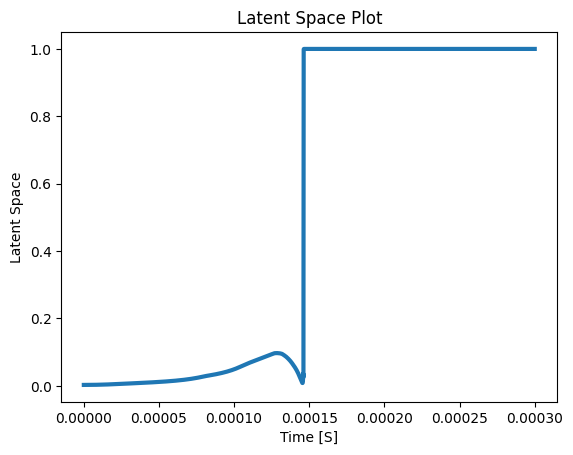

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,2.272854e-11,1.291363e-09,3.453104e-11,0.880602,1.935356e-11,2.615407e-13,0.000001,1.199251e-09,2.133399e-35,...,7.202273e-10,4.358685e-29,2.039820e-17,1.821580e-18,1.333767e-08,1.042998e-05,-7.877263e-04,1.855765e-28,1.299830e-28,7.302686e-30
1,0.405009,8.817785e-11,2.464085e-09,1.309110e-10,0.880602,7.465607e-11,1.942029e-12,0.000002,4.794342e-09,9.998656e-34,...,2.780386e-09,7.249003e-28,8.218853e-17,1.187610e-17,2.698916e-08,1.067374e-05,-7.879200e-04,5.331454e-27,3.377751e-27,2.158586e-28
2,0.405009,1.924776e-10,3.529468e-09,2.791672e-10,0.880602,1.619111e-10,6.309985e-12,0.000003,1.078388e-08,8.203659e-33,...,6.039273e-09,3.731931e-27,1.863419e-16,3.588966e-17,4.095658e-08,1.091823e-05,-7.881161e-04,3.769102e-26,2.376792e-26,1.571649e-27
3,0.405009,3.320511e-10,4.497958e-09,4.704511e-10,0.880602,2.773280e-10,1.451106e-11,0.000005,1.916595e-08,1.053635e-31,...,1.036799e-08,1.187733e-26,3.338447e-16,7.830846e-17,5.523977e-08,1.116178e-05,-7.883137e-04,1.491640e-25,9.603717e-26,6.401061e-27
4,0.405009,5.036828e-10,5.378963e-09,6.971249e-10,0.880602,4.174269e-10,2.754934e-11,0.000006,2.993871e-08,-1.337866e-31,...,1.565201e-08,2.905960e-26,5.256731e-16,1.427135e-16,6.983666e-08,1.140296e-05,-7.885123e-04,4.287859e-25,2.837420e-25,1.890979e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.970535,5.897548e-01,7.917200e-01,8.235509e-01,0.127105,9.861070e-01,8.750661e-01,0.041582,3.654180e-02,1.373250e-06,...,-4.762081e-20,-1.110482e-21,-1.746986e-22,-2.558047e-25,-7.304743e-27,-6.363614e-29,-4.201914e-31,-2.266647e-20,-4.475574e-21,-5.155031e-22
119995,0.970535,5.897548e-01,7.917200e-01,8.235509e-01,0.127105,9.861070e-01,8.750661e-01,0.041582,3.654180e-02,1.373250e-06,...,-4.808321e-20,-1.111531e-21,-1.744621e-22,-2.555139e-25,-7.287828e-27,-6.379768e-29,-4.189194e-31,-2.266469e-20,-4.472284e-21,-5.166894e-22
119996,0.970535,5.897548e-01,7.917200e-01,8.235509e-01,0.127105,9.861070e-01,8.750661e-01,0.041582,3.654180e-02,1.373250e-06,...,-4.749811e-20,-1.112801e-21,-1.739484e-22,-2.558990e-25,-7.294501e-27,-6.374351e-29,-4.166787e-31,-2.267311e-20,-4.474177e-21,-5.165703e-22
119997,0.970535,5.897548e-01,7.917200e-01,8.235509e-01,0.127105,9.861070e-01,8.750661e-01,0.041582,3.654180e-02,1.373250e-06,...,-4.840398e-20,-1.112356e-21,-1.740708e-22,-2.564203e-25,-7.296701e-27,-6.377717e-29,-4.201378e-31,-2.260693e-20,-4.472144e-21,-5.161739e-22


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.807210,0.872655,0.874347,0.874338,-0.815251,0.816305,0.810933,0.031803,-0.114050,0.804833,...,-0.267819,-0.267527,-0.267923,-0.267925,-0.267802,-0.321472,-0.038550,-0.267636,-0.267754,-0.267770
1,-0.167857,-0.242778,-0.244470,-0.244468,0.168022,-0.169069,-0.163725,0.610526,0.732149,-0.157646,...,0.677654,0.694368,0.692889,0.693003,0.684255,0.638020,0.312389,0.694104,0.693832,0.693699
2,0.818198,0.831432,0.833158,0.833149,-0.826362,0.827431,0.821978,0.030500,-0.165461,0.815774,...,-0.315444,-0.326644,-0.326781,-0.326834,-0.321511,-0.380511,-0.037503,-0.326754,-0.326873,-0.326874


H      0.874347
O      0.874338
H2     0.872655
CO     0.867917
CO2    0.816847
Name: 0, dtype: float64
CH2OH     0.870857
CH2       0.860149
HCCOH     0.855764
CH2CO     0.843618
CH2(S)    0.822511
Name: 1, dtype: float64
H      0.833158
O      0.833149
H2     0.831432
CO2    0.827981
OH     0.827431
Name: 2, dtype: float64


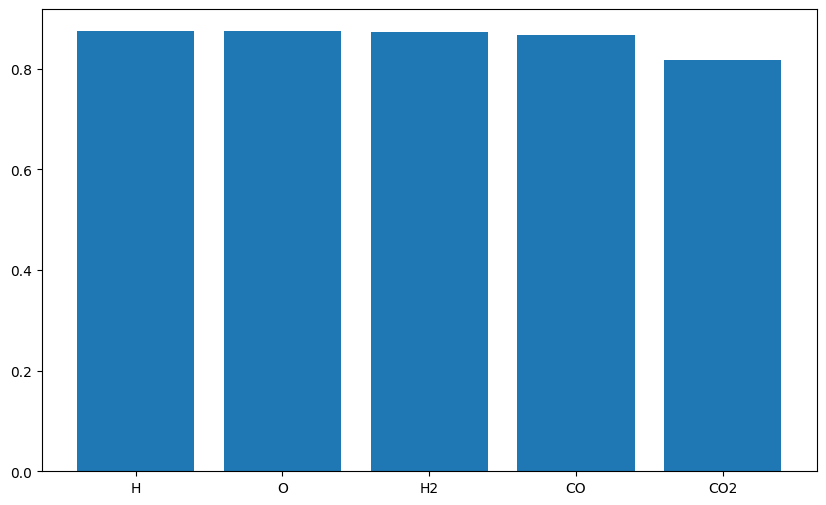

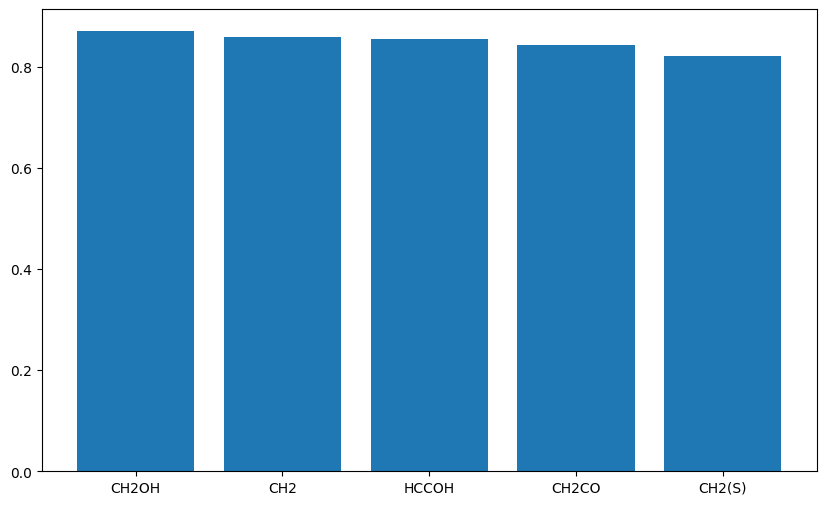

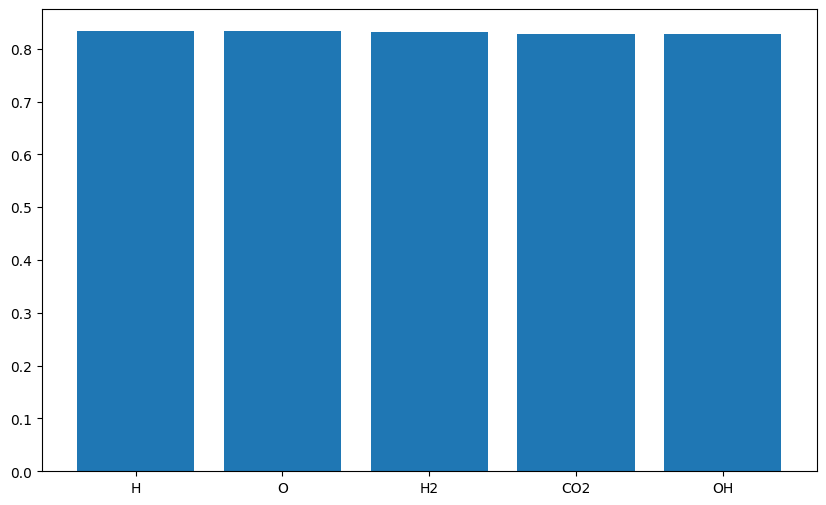

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.896797,0.939814,0.941223,0.941223,-0.900191,0.900940,0.896815,-0.021045,-0.340544,0.892439,...,-0.650119,-0.649871,-0.650720,-0.650724,-0.650418,-0.661624,-0.137654,-0.650102,-0.650352,-0.650390
1,-0.444681,-0.498280,-0.501592,-0.501592,0.448627,-0.449416,-0.443307,0.714539,0.840109,-0.431658,...,0.785802,0.809071,0.807264,0.807423,0.795191,0.783606,0.352824,0.808772,0.808467,0.808293
2,0.917043,0.923394,0.924999,0.924999,-0.920197,0.920953,0.917090,-0.010494,-0.367947,0.908133,...,-0.667312,-0.682259,-0.682737,-0.682811,-0.675505,-0.693106,-0.113560,-0.682488,-0.682736,-0.682751


H      0.941223
O      0.941223
H2     0.939814
CO     0.936349
CO2    0.901327
Name: 0, dtype: float64
CH2OH     0.941894
CH2       0.934146
HCCOH     0.930864
CH2CO     0.921849
CH2(S)    0.905792
Name: 1, dtype: float64
H      0.924999
O      0.924999
H2     0.923394
CO2    0.921344
OH     0.920953
Name: 2, dtype: float64


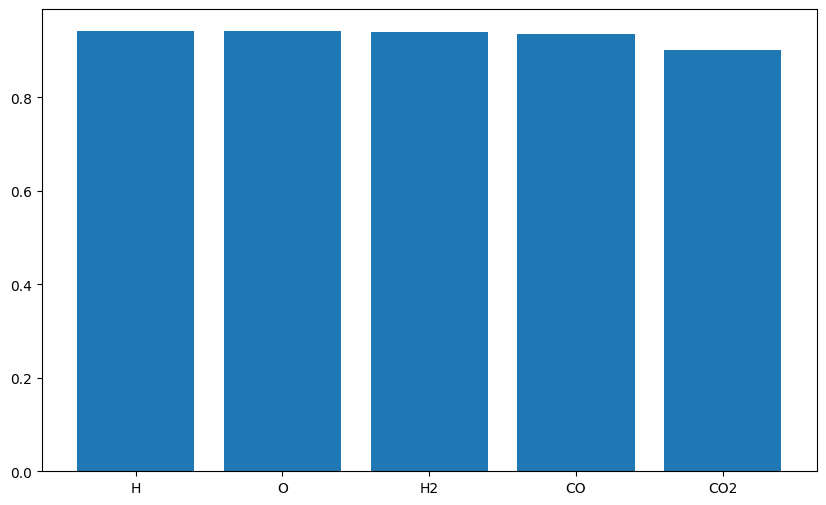

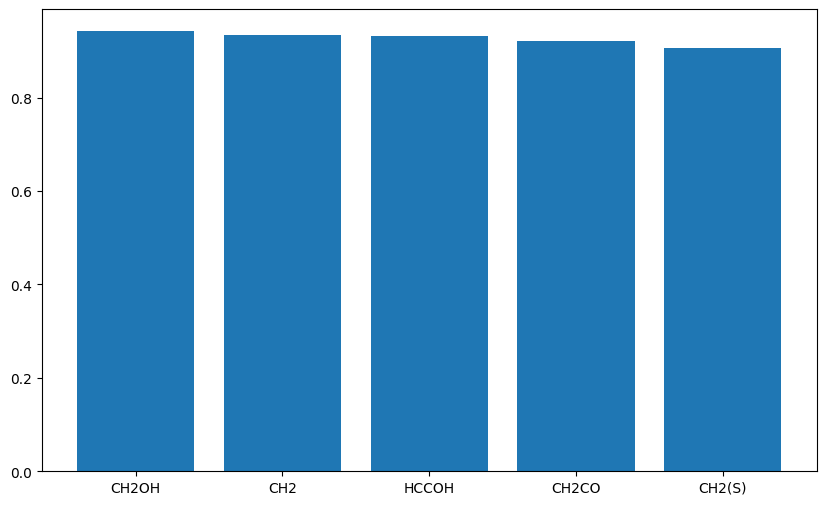

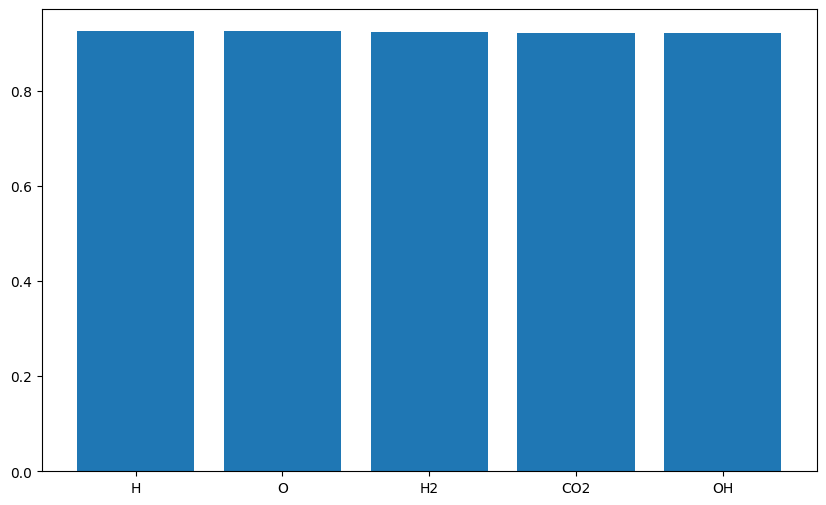

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.807195,0.872657,0.874349,0.874340,-0.815234,0.816288,0.810916,0.031775,-0.114062,0.804816,...,-0.267813,-0.267524,-0.267917,-0.267919,-0.267796,-0.321466,-0.038557,-0.267633,-0.267751,-0.267767
1,-0.167835,-0.242771,-0.244463,-0.244460,0.168002,-0.169050,-0.163706,0.610536,0.732149,-0.157626,...,0.677632,0.694337,0.692861,0.692975,0.684232,0.637991,0.312388,0.694073,0.693800,0.693668
2,0.818183,0.831434,0.833160,0.833151,-0.826344,0.827413,0.821960,0.030474,-0.165456,0.815756,...,-0.315414,-0.326641,-0.326758,-0.326811,-0.321477,-0.380493,-0.037509,-0.326752,-0.326869,-0.326863


H      0.874349
O      0.874340
H2     0.872657
CO     0.867920
CO2    0.816830
Name: 0, dtype: float64
CH2OH     0.870840
CH2       0.860174
HCCOH     0.855787
CH2CO     0.843646
CH2(S)    0.822495
Name: 1, dtype: float64
H      0.833160
O      0.833151
H2     0.831434
CO2    0.827963
OH     0.827413
Name: 2, dtype: float64


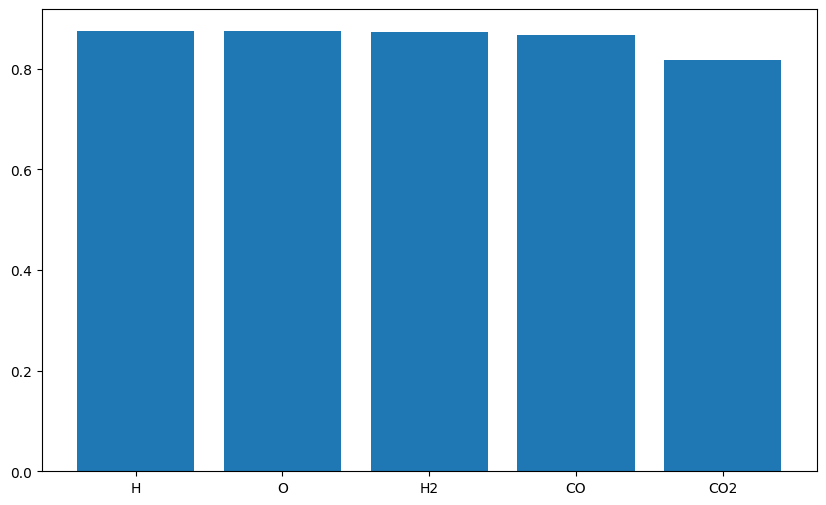

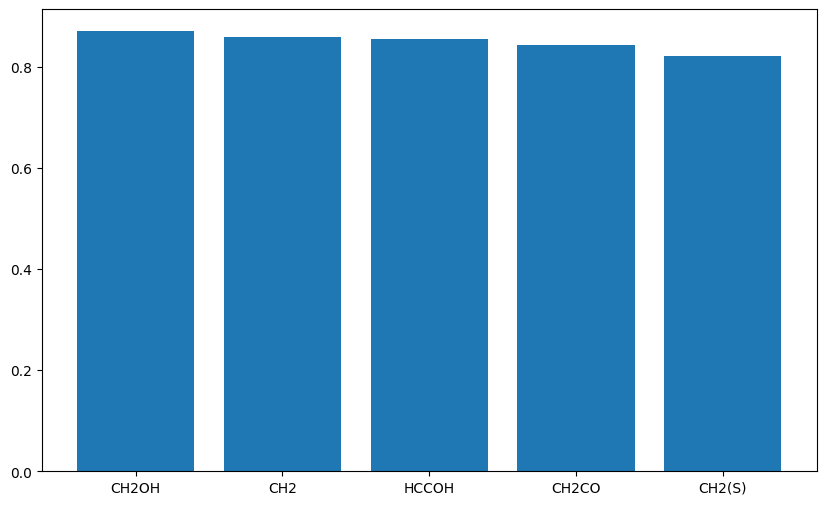

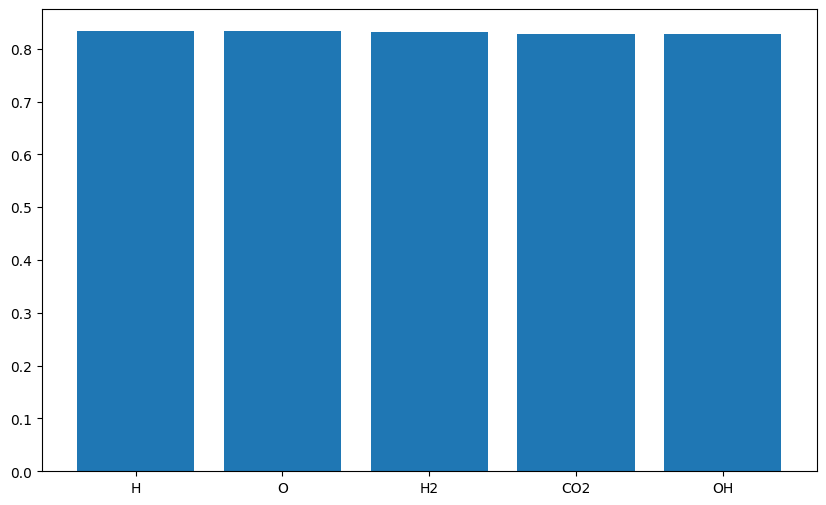

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)